In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from sklearn.impute import KNNImputer
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

### This is a binary classification problem.

### The dataset’s  positive class (1) consists of component failures for a specific component of the APS system.

### The The dataset’s negative class (0) consists of trucks with failures for components not related to the APS.

### 1.	Develop strategies, incorporating basic programming skills (input / output and basic data structures) for identifying and handling missing and out-of-range data

### 2.	Programmatically implement graphical methods to identify issues within a data set (missing, out of range, dirty data)

### 3.	Perform a critical analysis of a data set to optimise the data for a given problem space. Document the rationale behind the decisions to peers and stakeholders.

### The hipotesis we are considering it is that with our database we can analyse how much cost the company to bring our trucks to the mechanic when the failures are not for failures related to the APS sistem, in order to decide the company how to prevent this for happaening again using differents strategies.

### We took into account the price of each time the trucks were sent to the mechanic for problems related to the APS system, which was €10, and €500 when we sent the trucks to the mechanic not for problems with the APS system, but for problems with the rest of the components, even though the problems were actually with the APS system, so ended up costing more money in the future.

## Dataset analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive")
!ls

 CA1  'Colab Notebooks'


In [4]:
df=pd.read_csv("/content/drive/MyDrive/CA1/DataPreparation/aps_failure_set.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [6]:
df.tail(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [7]:
df.shape

(60000, 171)

### In order to study Scania trucks and their components failure it is useless to keep entries with the same values.

In [8]:
df = df.drop_duplicates()
df.shape

(60000, 171)

In [9]:
df.count()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

In [10]:
df.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We realised the datatypes are incorrect.

In [11]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [12]:
unique_values = df.nunique()
unique_values

class         2
aa_000    22095
ab_000       30
ac_000     2062
ad_000     1887
          ...  
ee_007    30470
ee_008    24214
ee_009     9725
ef_000       29
eg_000       50
Length: 171, dtype: int64

The first thing we do, it is to analyse if the NaN values have a different format but na, in order to convert them to NaN.

In [13]:
string_columns = df.select_dtypes(include=['object'])

# Loop through the selected string columns and print unique values
for column in string_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'class': ['neg' 'pos']
Unique values in column 'ab_000': ['na' '0' '2' '4' '6' '8' '18' '10' '12' '16' '204' '24' '134' '90' '26'
 '14' '34' '52' '20' '22' '30' '36' '100' '48' '58' '32' '28' '44' '46'
 '68']
Unique values in column 'ac_000': ['2130706438' '0' '228' ... '8974' '123514' '2602']
Unique values in column 'ad_000': ['280' 'na' '100' ... '5286' '3608' '194868']
Unique values in column 'ae_000': ['0' '16' '104' 'na' '2' '222' '4' '290' '1286' '170' '6' '806' '1464'
 '274' '18' '8' '342' '64' '34' '192' '144' '176' '1512' '120' '58' '114'
 '460' '12' '112' '1314' '20' '550' '36' '1424' '180' '324' '204' '254'
 '106' '154' '92' '256' '202' '352' '26' '124' '2240' '466' '778' '28'
 '100' '14' '276' '42' '82' '22' '384' '282' '386' '98' '164' '108' '86'
 '38' '266' '1056' '134' '10' '200' '150' '326' '350' '398' '424' '32'
 '128' '752' '314' '732' '2312' '400' '158' '668' '30' '212' '224' '950'
 '4726' '60' '226' '388' '640' '258' '62' '206' '44' '414' '45

In [14]:
df2 = df.replace(['na'],[np.NaN])
df2.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [15]:
columns_changing = df2.columns[1:]

#Change the data type of the selected columns
df2[columns_changing] = df2[columns_changing].astype('float')

We also decided to change the numners data types all to float datatype, and keep the label column as a float converted to 0 and 1.

In [16]:
column_dtypes = df2.dtypes

# Print the data types
print(column_dtypes)

class      object
aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


In [17]:
df2.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,NaN,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,NaN,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,NaN,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000


In [18]:
df3=df2.rename(columns={"class": "classification"})
df3.columns

Index(['classification', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000',
       'af_000', 'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [19]:
df3['classification'].value_counts()

neg    59000
pos     1000
Name: classification, dtype: int64

In [20]:

df3['classification'] = df3.classification.map({'neg':0, 'pos':1})

In [21]:
df3['classification'].value_counts()

0    59000
1     1000
Name: classification, dtype: int64

In [22]:
df3.describe(include='all')

,classification,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,0.128020,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


Once we have changed all the datatype and converted the na values to NaN, we process to trry to analyse visualy how much NaN values we have.

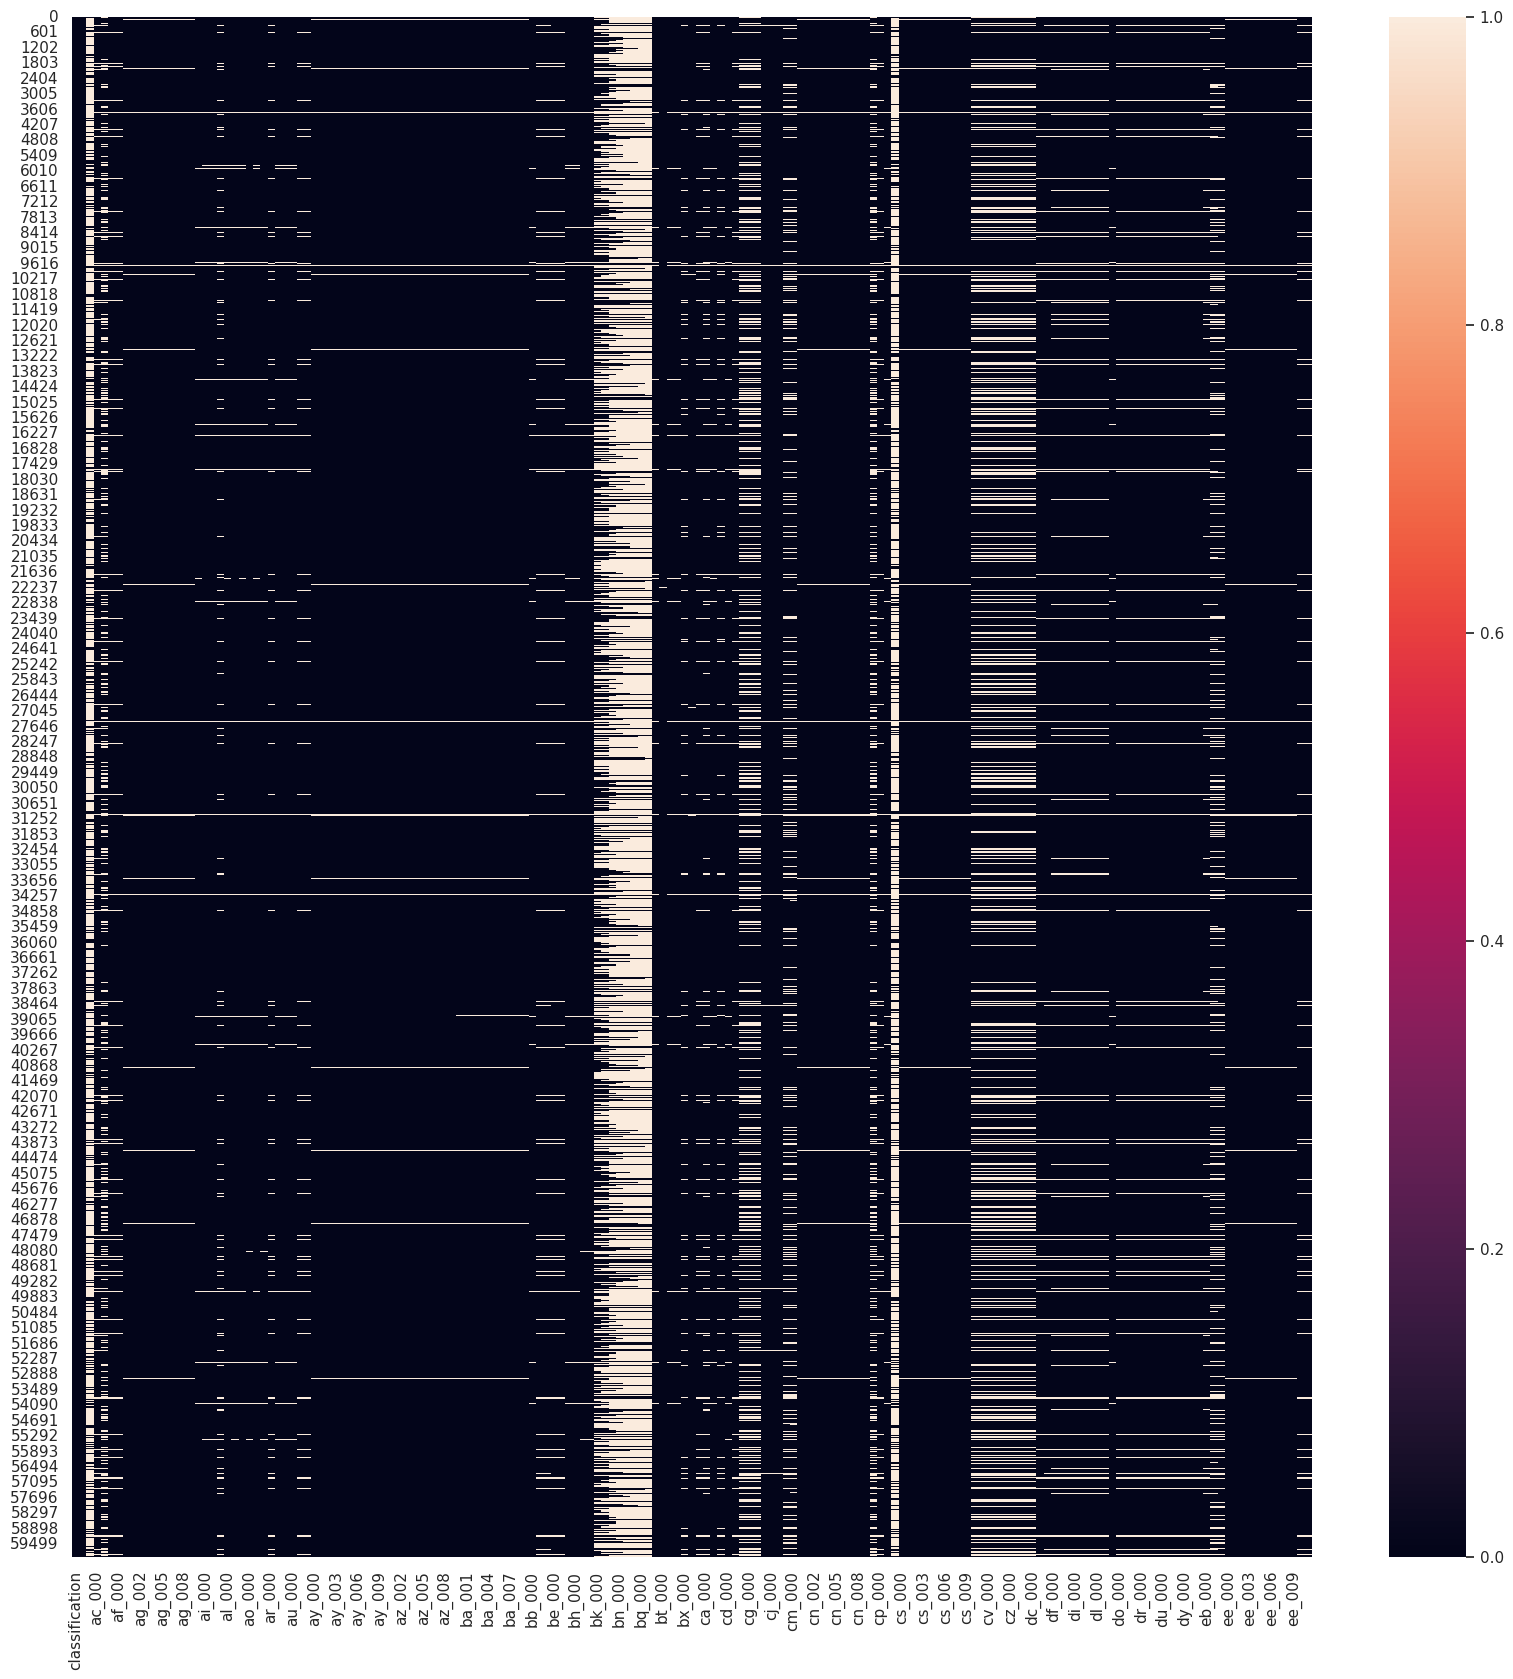

In [23]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(df3.isnull())
plt.show(plot)

<Axes: >

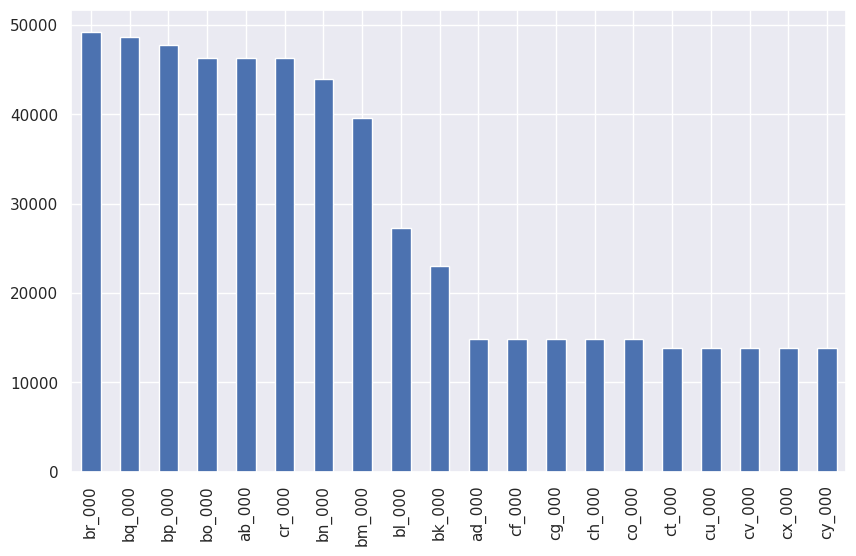

In [24]:
df3.isnull().sum().nlargest(20).plot(kind='bar', figsize=(10, 6))

In [25]:
df3.isnull().any()

classification    False
aa_000            False
ab_000             True
ac_000             True
ad_000             True
                  ...  
ee_007             True
ee_008             True
ee_009             True
ef_000             True
eg_000             True
Length: 171, dtype: bool

In [26]:
df3.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [27]:
df3.isnull().sum()

classification        0
aa_000                0
ab_000            46329
ac_000             3335
ad_000            14861
                  ...  
ee_007              671
ee_008              671
ee_009              671
ef_000             2724
eg_000             2723
Length: 171, dtype: int64

In [29]:
df3.isnull().sum().nlargest(10)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
cr_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
dtype: int64

We have decided to removed those columns where the amount of Nan values is more than 70%, in order to have a database the most clear possible to our prediction.

### Columns where missing values are more than 70% -> 60000x0.7=42000

In [30]:
#df5=df3.dropna(axis = 1, thresh=42000,inplace= True)
df4 = df3.dropna(axis=1, thresh=(len(df3) - 42000))

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 164 entries, classification to eg_000
dtypes: float64(163), int64(1)
memory usage: 75.5 MB


In [32]:
df4.describe()

,classification,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,0.128020,1.454301e+05,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [33]:
df3.shape

(60000, 171)

In [34]:
df4.shape

(60000, 164)

In [35]:
df4.isnull().sum().nlargest(10)

bm_000    39549
bl_000    27277
bk_000    23034
ad_000    14861
cf_000    14861
cg_000    14861
ch_000    14861
co_000    14861
ct_000    13808
cu_000    13808
dtype: int64

### Step 2

In [36]:
df5 = df4.select_dtypes(include=['float64'])
medians = df4.median()
#df4=df4.fillna(medians, inplace=True)
df5=df5.fillna(medians)

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 163 entries, aa_000 to eg_000
dtypes: float64(163)
memory usage: 75.1 MB


In [38]:
df5['classification']=df3['classification']

<ipython-input-38-3a2c49ec7e5c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df5['classification']=df3['classification']


In [39]:
df5.columns

Index(['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009',
       'ef_000', 'eg_000', 'classification'],
      dtype='object', length=164)

In [40]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 164 entries, aa_000 to classification
dtypes: float64(163), int64(1)
memory usage: 75.5 MB


In [41]:
print("Percentage of Scania trucks with failures for components not related to the APS \n", (df5[df5['classification']== 0].shape[0] / df5.shape[0]) * 100)
print("Percentage of Scania trucks with failures for components related to the APS \n", (df5[df5['classification']== 1].shape[0] / df5.shape[0]) * 100)

Percentage of Scania trucks with failures for components not related to the APS 
 98.33333333333333
Percentage of Scania trucks with failures for components related to the APS 
 1.6666666666666667


### Performing a critical analysis to optimise the database

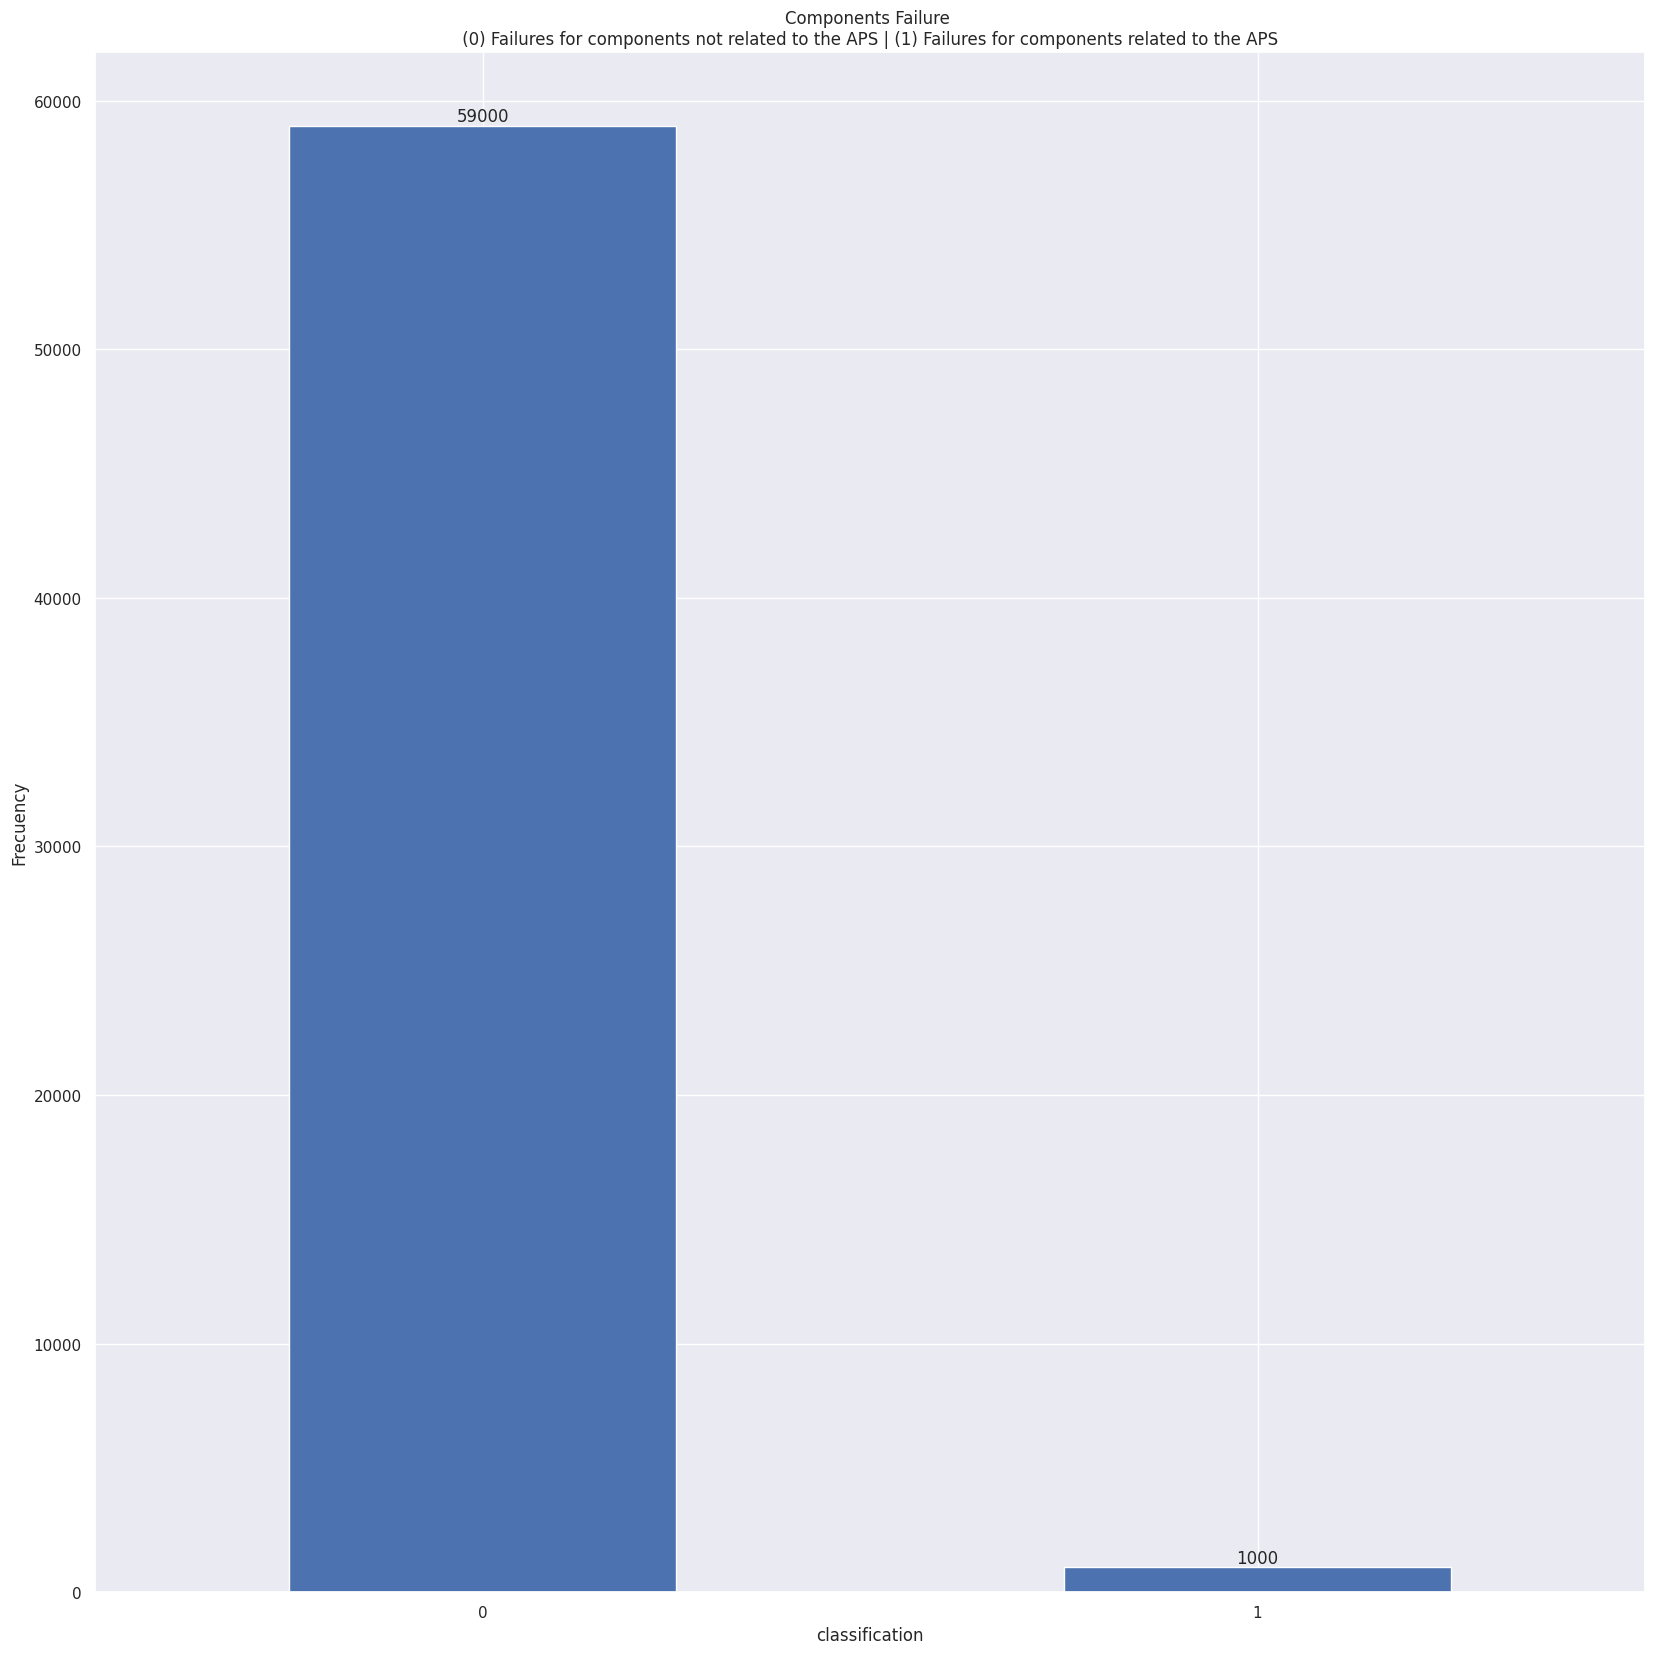

In [42]:
Count = pd.value_counts(df5['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS | (1) Failures for components related to the APS ")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

WWe have decided to study outliers, just to see if there is a possibility our database has more data useless.

In [43]:
#outliers

Q1 = df5.quantile(0.25)
Q3 = df5.quantile(0.75)
IQR = Q3-Q1
print(IQR)

aa_000             47834.0
ac_000               828.0
ad_000               250.0
ae_000                 0.0
af_000                 0.0
                    ...   
ee_008            136725.5
ee_009              1934.0
ef_000                 0.0
eg_000                 0.0
classification         0.0
Length: 164, dtype: float64


In [44]:
df5_no_label = df5.drop(df5["classification"])

In [45]:
df5_no_label = df5_no_label[~((df5_no_label < (Q1-1.5 * IQR)) |(df5_no_label > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
df5_no_label["classification"] = df5["classification"]
df_outliers=df5_no_label
df_outliers.describe

<bound method NDFrame.describe of         aa_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
47        18.0   124.0   126.0     0.0     0.0     0.0     0.0     0.0   
56     24836.0   152.0   126.0     0.0     0.0     0.0     0.0     0.0   
88       812.0    44.0    34.0     0.0     0.0     0.0     0.0     0.0   
165     1800.0   370.0   346.0     0.0     0.0     0.0     0.0     0.0   
168     2750.0    74.0    68.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
59899     26.0    26.0    14.0     0.0     0.0     0.0     0.0     0.0   
59901   1578.0   166.0   154.0     0.0     0.0     0.0     0.0     0.0   
59918   1266.0    86.0    76.0     0.0     0.0     0.0     0.0     0.0   
59981     16.0    20.0    20.0     0.0     0.0     0.0     0.0     0.0   
59994     32.0     0.0   126.0     0.0     0.0     0.0     0.0     0.0   

       ag_003  ag_004  ...    ee_003    ee_004    ee_005   ee_006   ee_007  \

As we can see in the next grapgh, removing outliers remove our feilires for components related to the APS so it is not interested for us to keep using this technique.

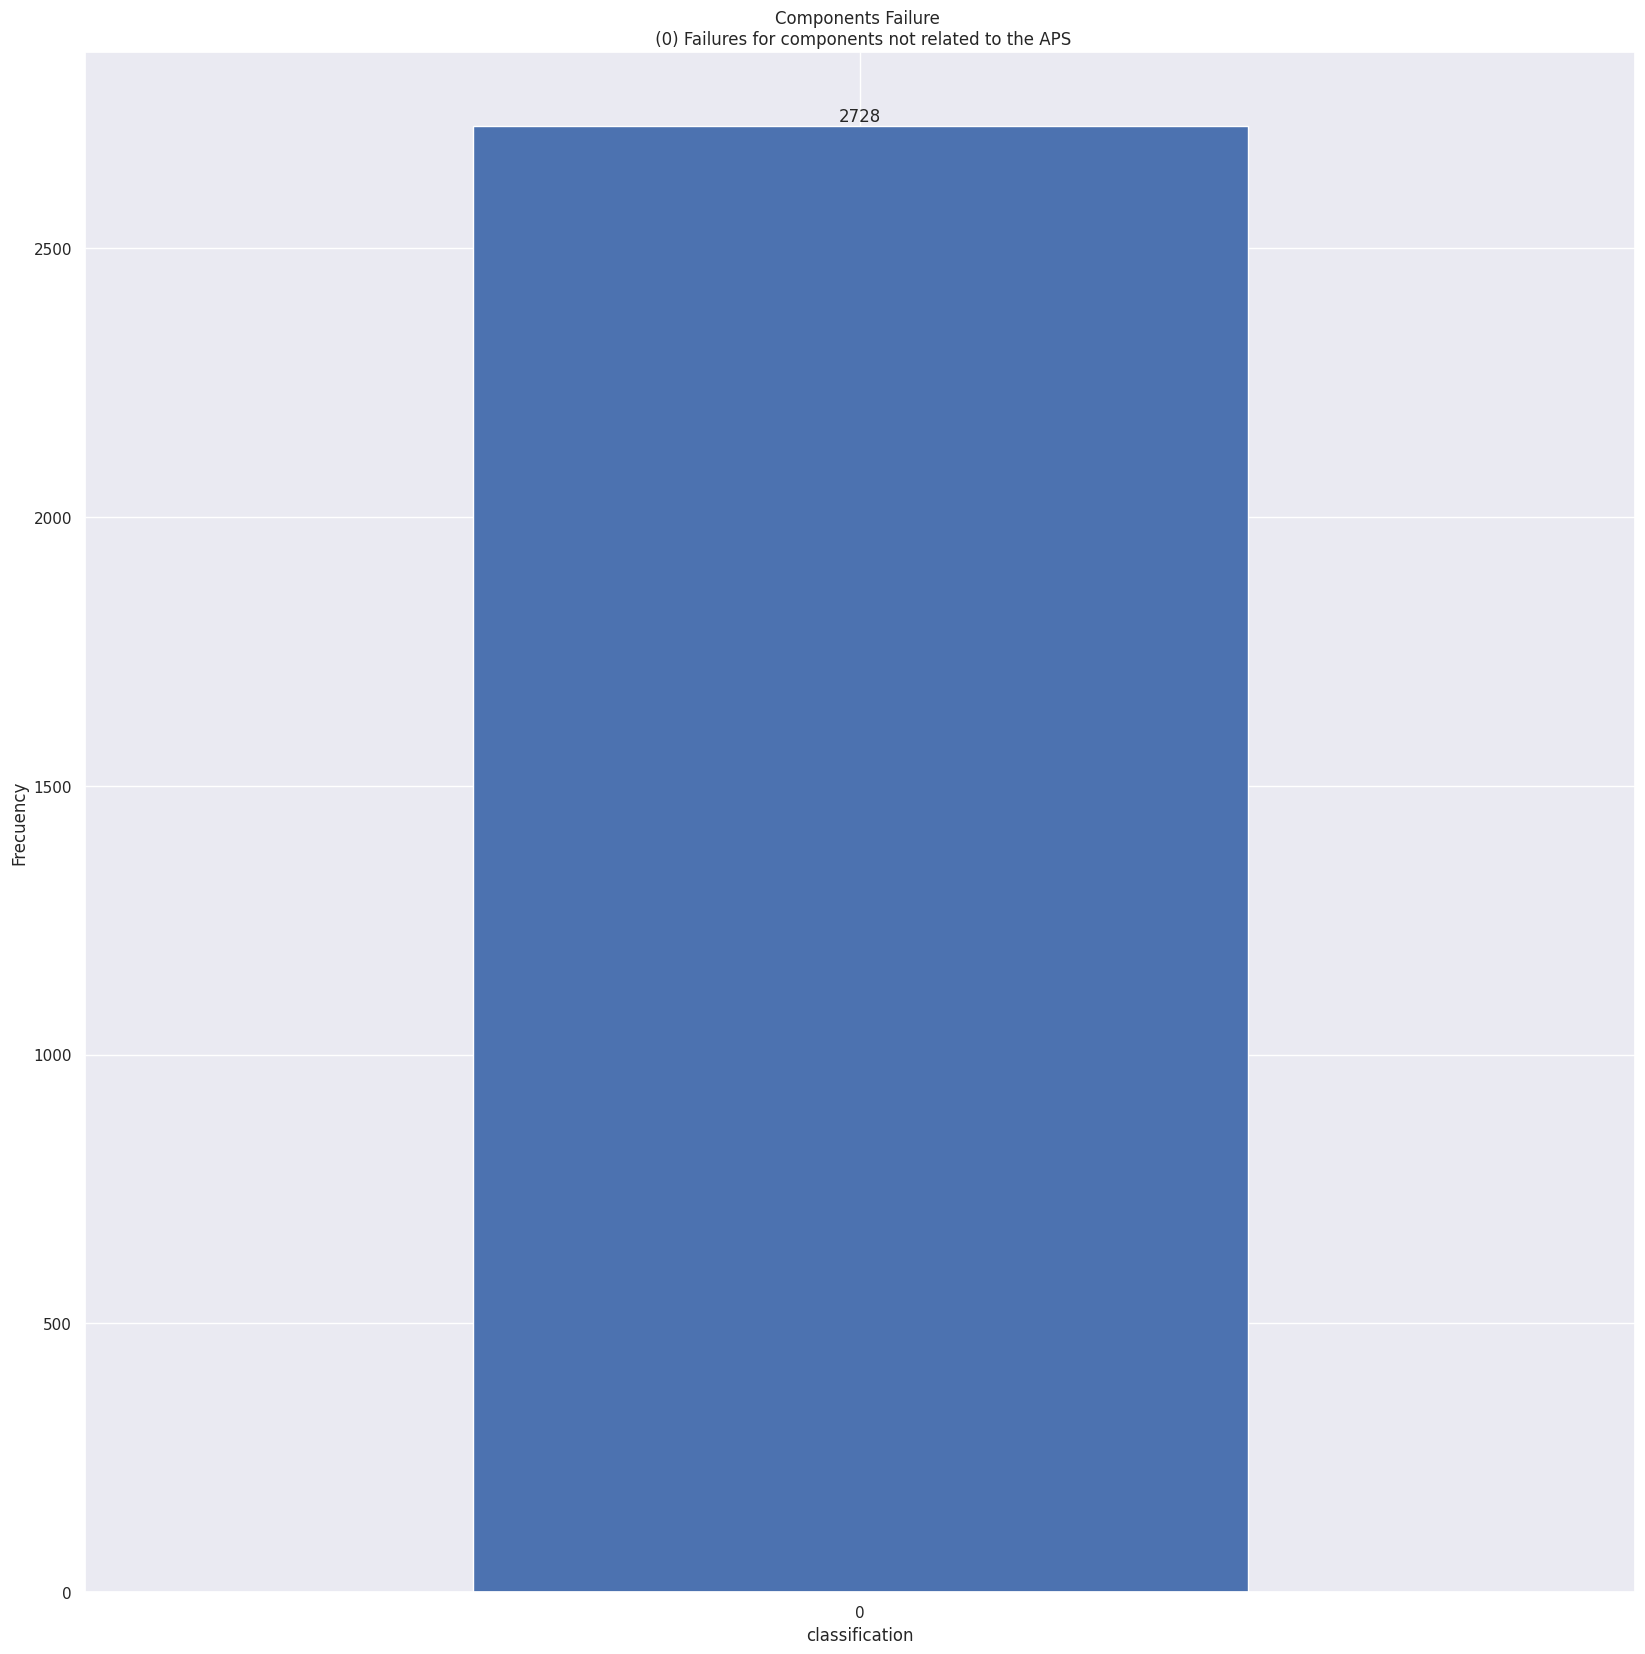

In [47]:
Count = pd.value_counts(df_outliers['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

Once we have cleaned the data all possible we have decided to convert all the data in a normalized format in order to avoid problems with lineal algorithms.

In [48]:
scaler = MinMaxScaler()

# Fit and transform the numerical data
df5[df5.columns] = scaler.fit_transform(df5)

In [49]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 164 entries, aa_000 to classification
dtypes: float64(164)
memory usage: 77.5 MB


In order to perform the best outcome from our predictive algorithms we have the decided to apply PCA techniques.
### PCA is a techniques which look for the best amount of features in order to obtain the best outcome from our algorithms, since when the amount of feateures is too big the algorithms they might not perform well.

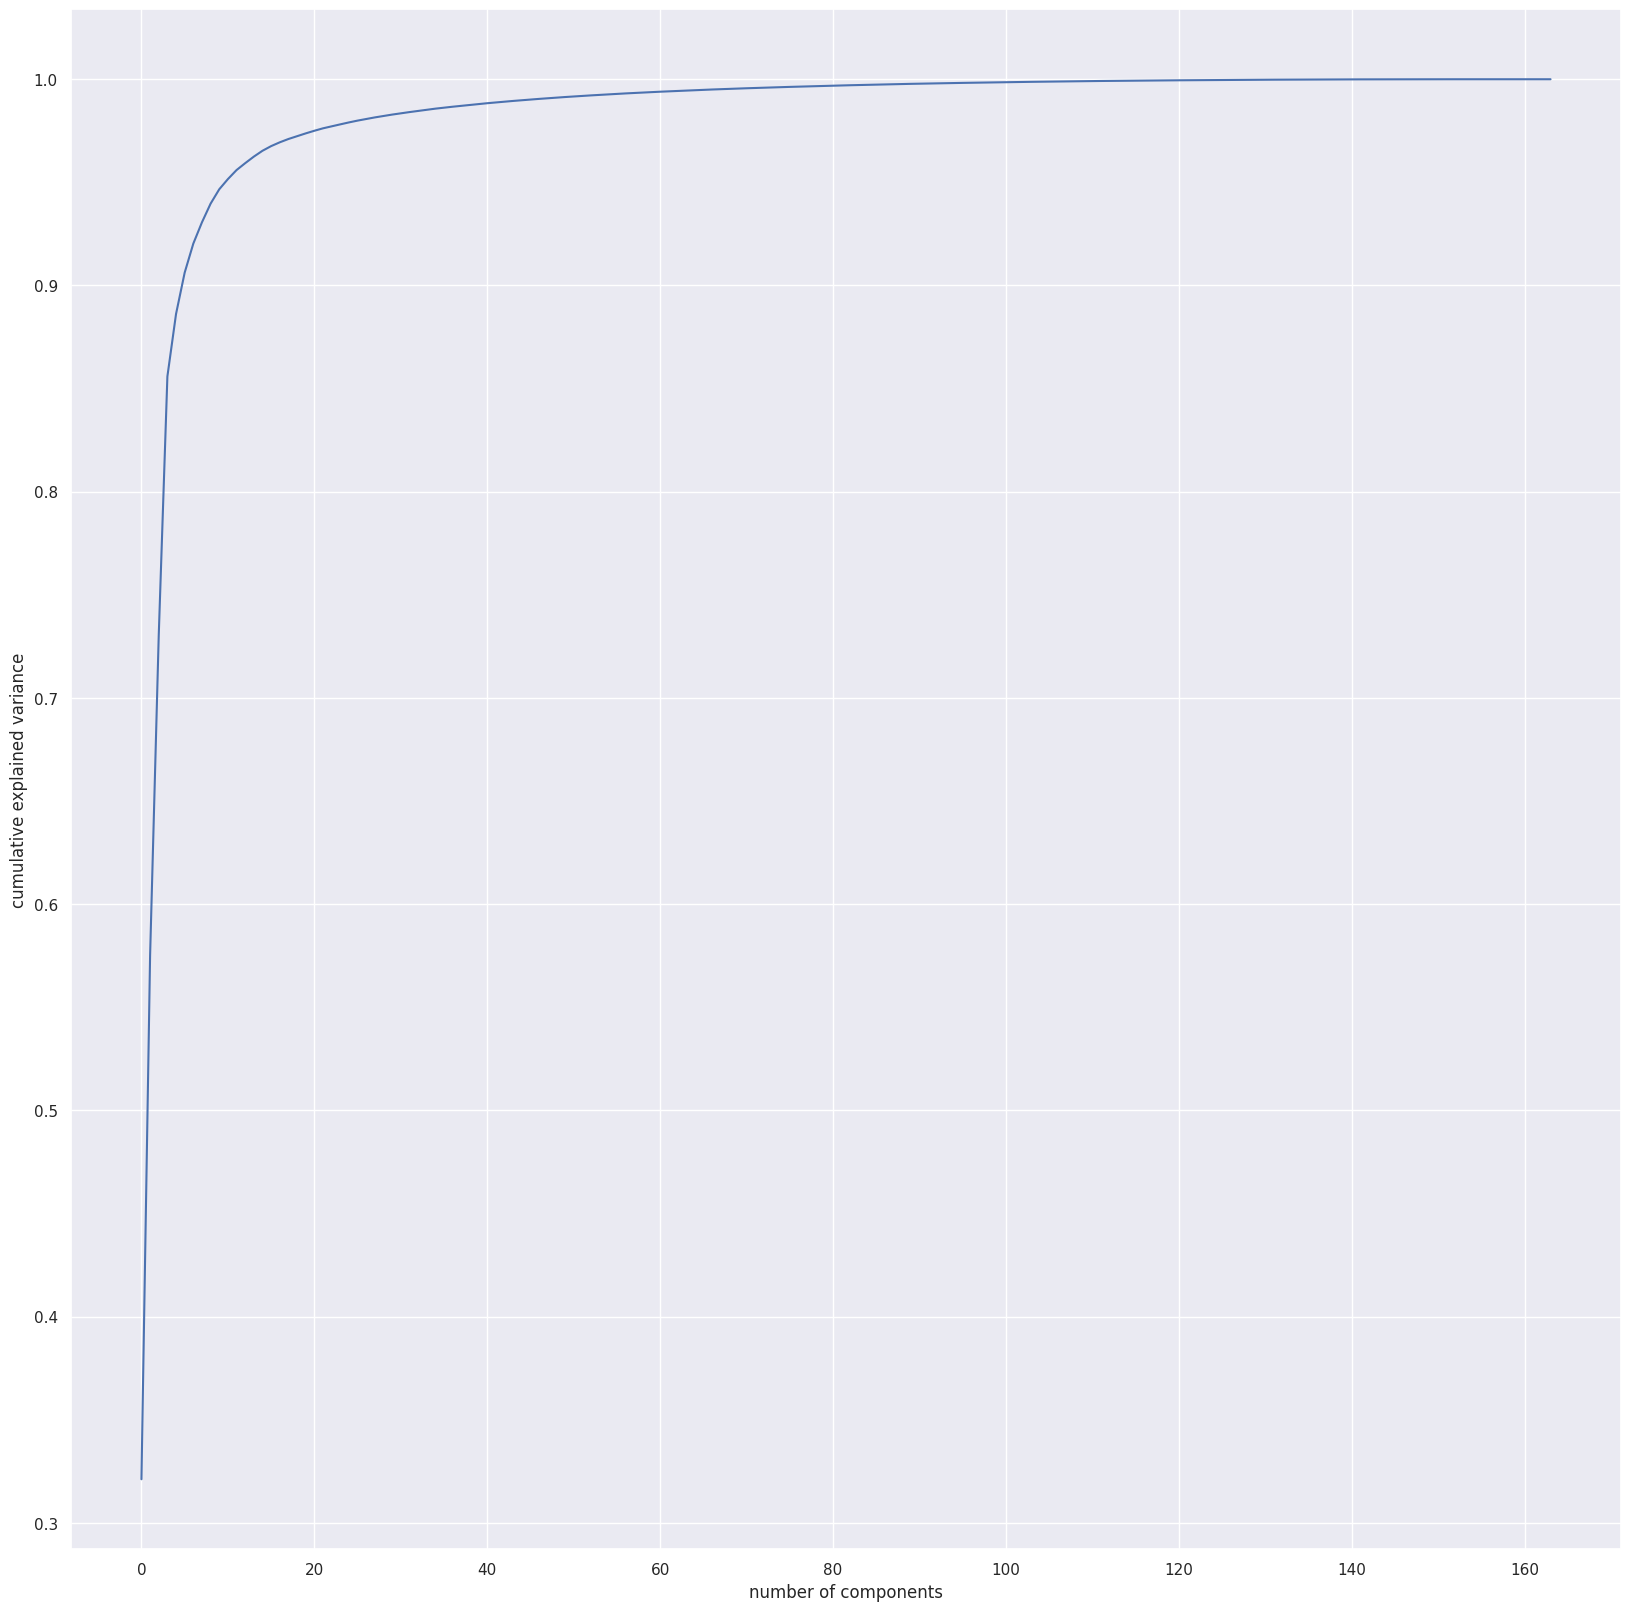

In [86]:
df5_no_label = df5.drop(df5["classification"])
pca = PCA().fit(df5_no_label)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [51]:
pca = PCA(80)
projected = pca.fit_transform(df5_no_label)

In [52]:
projected.shape

(59998, 80)

In [53]:
df5_pca= pd.DataFrame(projected)

df5_pca["classification"] = df5["classification"]

In [54]:
df5_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,classification
0,-0.205345,-0.097024,-0.171187,-0.009731,0.004589,0.009938,-0.043641,-0.001436,-0.008821,0.002897,...,0.000604,0.000614,-0.001823,0.000376,0.000059,0.000023,0.000378,-0.000574,0.000289,0.0
1,-0.468957,-0.076199,-0.104651,-0.032482,-0.001288,-0.010585,-0.008503,0.003157,0.007950,-0.001685,...,0.000201,0.000415,-0.001813,-0.003348,-0.005967,0.000756,0.000874,0.002389,-0.000814,0.0
2,0.271882,-0.186908,-0.023089,-0.064689,-0.018570,0.007944,0.059597,-0.008647,-0.022495,-0.010026,...,0.000466,-0.004600,0.002998,0.001284,-0.001400,-0.000556,-0.002516,-0.001326,0.005803,0.0
3,0.011139,0.841942,0.111004,0.067454,-0.012402,0.006684,-0.025481,-0.004101,-0.015090,-0.009224,...,-0.000670,0.000493,-0.003026,-0.001973,0.001785,-0.001868,-0.003291,-0.000707,-0.000623,0.0
4,-0.476466,-0.075402,-0.104754,-0.029392,0.001251,-0.008646,-0.009290,-0.002634,0.005979,0.005870,...,-0.001347,-0.000885,0.000227,0.000103,0.000106,-0.000055,0.000552,-0.000413,0.000445,0.0


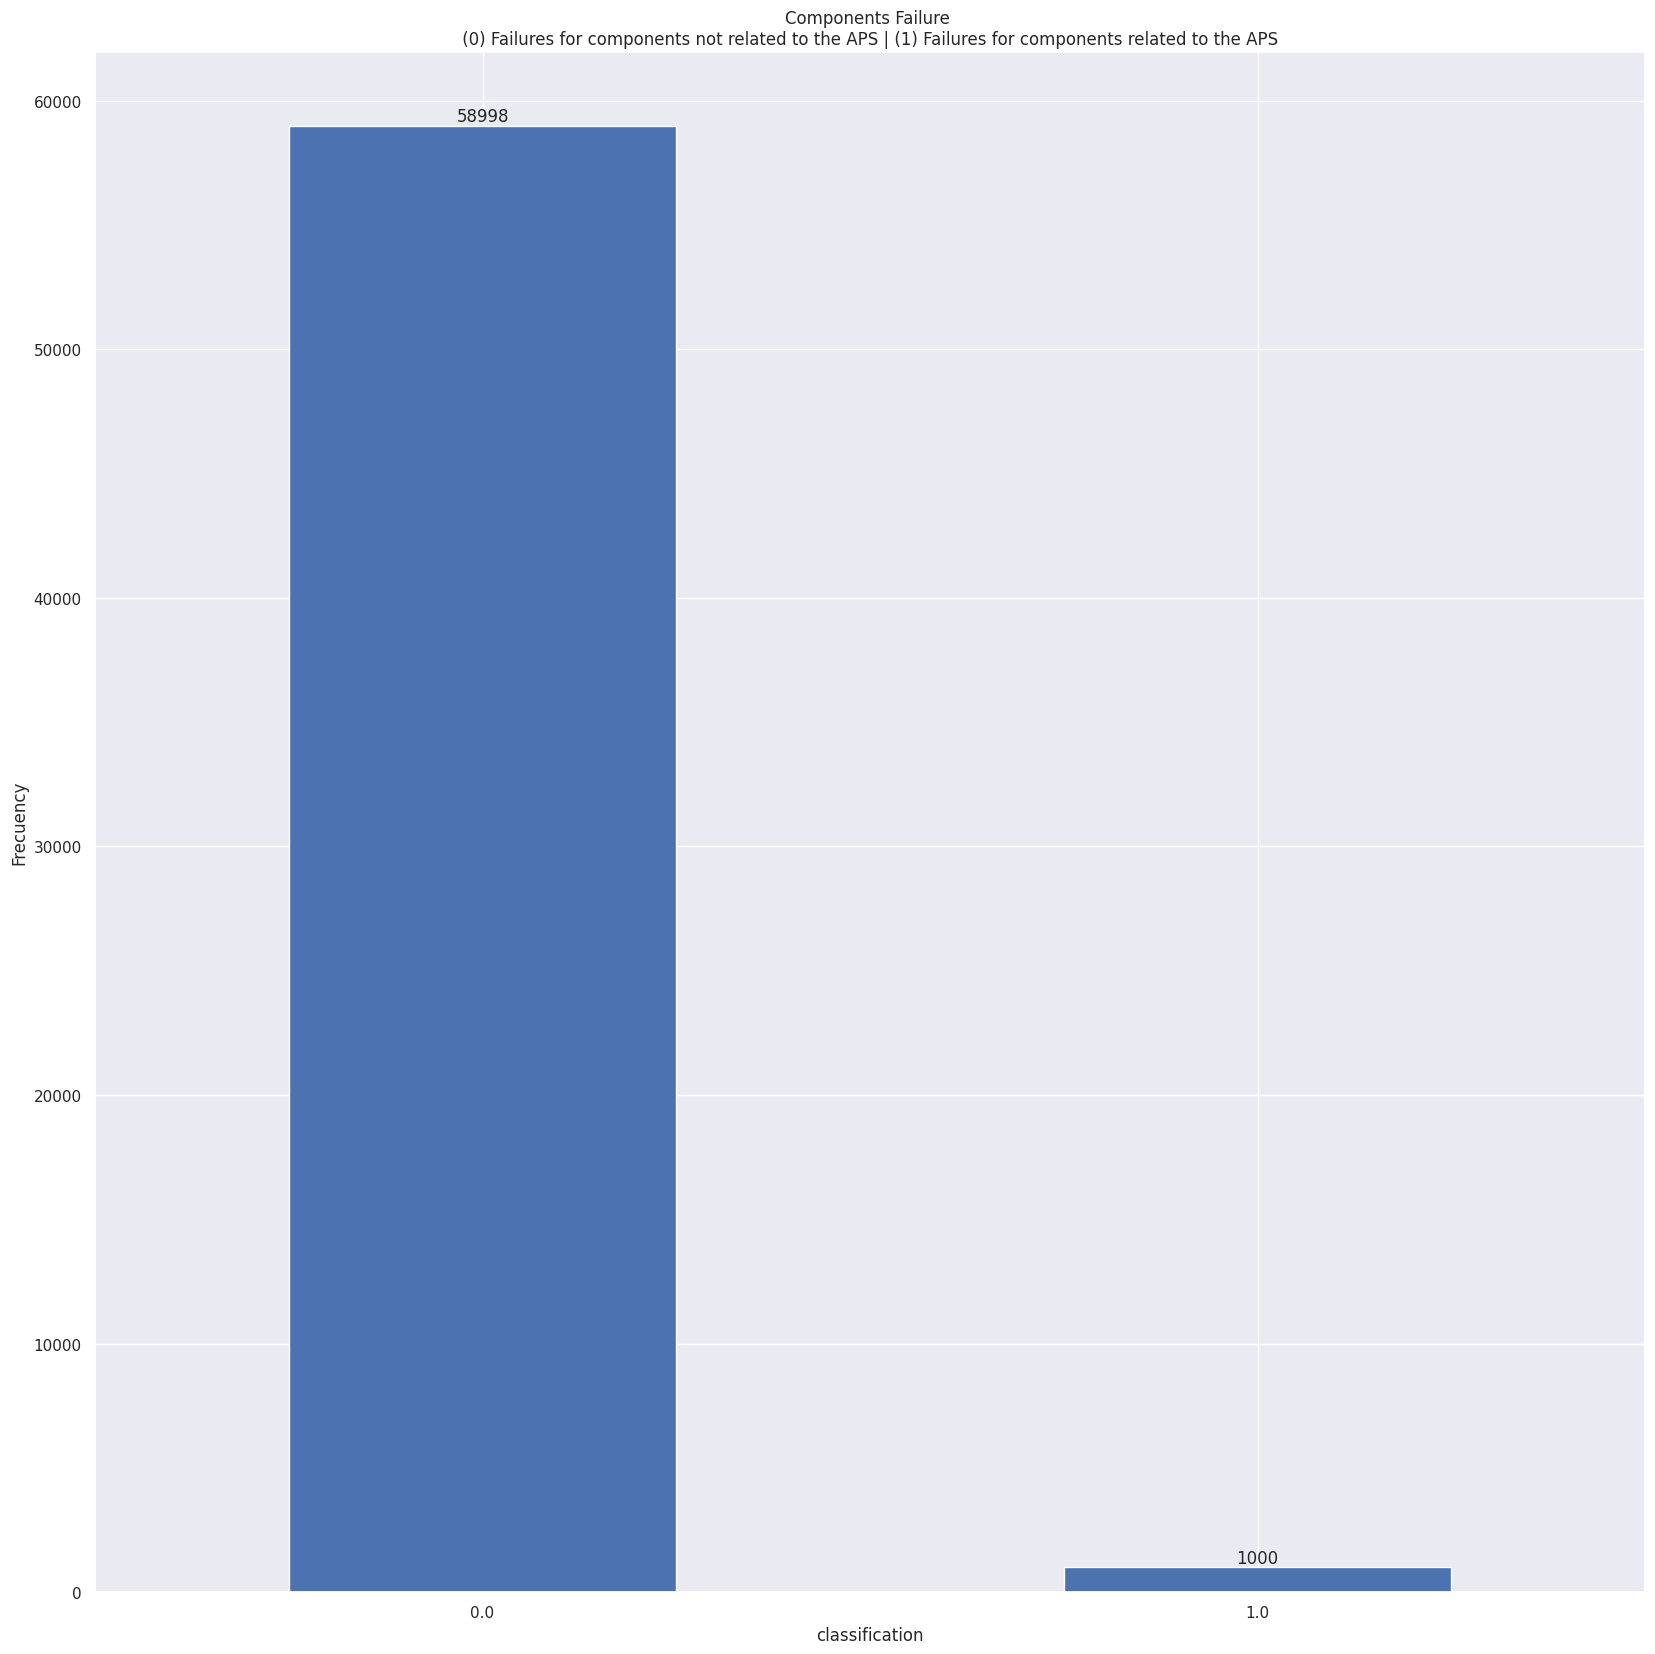

In [55]:
Count = pd.value_counts(df5_pca['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS | (1) Failures for components related to the APS ")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

In [56]:
df5_pca.shape

(59998, 81)

### We tried to analyse the correlation but since we have too many features it is useless.

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,classification
0,1.000000e+00,-4.646010e-17,-6.032622e-17,1.410755e-17,-1.727671e-18,-1.981641e-17,3.324979e-17,-1.583491e-17,-6.465488e-18,-2.955324e-17,...,-1.025207e-17,8.829951e-18,-3.923636e-17,-6.992710e-18,2.720515e-17,1.473367e-17,2.101795e-18,-1.039521e-17,-3.951245e-17,0.005815
1,-4.646010e-17,1.000000e+00,-5.686094e-16,3.318052e-17,4.624610e-17,-6.011219e-18,6.942002e-18,1.223984e-17,-2.467503e-17,-1.860868e-17,...,-1.061034e-17,6.180577e-18,2.649972e-17,-3.467548e-18,1.998355e-17,-9.379355e-18,-6.542492e-17,2.560137e-17,1.141898e-17,-0.000717
2,-6.032622e-17,-5.686094e-16,1.000000e+00,-7.165521e-17,3.864167e-18,1.091631e-18,2.823806e-17,-3.044651e-17,-1.517458e-17,2.713580e-18,...,-5.313870e-18,8.039843e-18,1.626862e-17,-1.796799e-18,3.703328e-17,-2.613837e-17,-3.626669e-17,1.473796e-18,-9.061449e-18,0.000295
3,1.410755e-17,3.318052e-17,-7.165521e-17,1.000000e+00,-1.622733e-17,-1.548526e-16,3.928472e-17,-1.120603e-16,-7.771551e-17,-1.058750e-16,...,-1.256094e-16,-1.259701e-16,2.331623e-16,2.668815e-17,2.949868e-17,1.164956e-16,1.113244e-16,1.697934e-16,5.308183e-17,-0.001344
4,-1.727671e-18,4.624610e-17,3.864167e-18,-1.622733e-17,1.000000e+00,-7.076098e-18,1.167410e-16,-5.320741e-17,4.204065e-17,7.027213e-18,...,-5.550628e-19,1.029558e-16,4.197443e-17,2.160572e-17,9.065229e-18,1.494719e-17,-6.318147e-17,-5.340670e-17,7.028748e-17,0.002979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1.473367e-17,-9.379355e-18,-2.613837e-17,1.164956e-16,1.494719e-17,3.527264e-17,-2.960886e-18,-4.128842e-17,8.044473e-17,2.074616e-18,...,-2.616003e-16,1.678144e-16,-1.492085e-17,-7.701200e-17,-4.504744e-16,1.000000e+00,1.801935e-16,-6.233533e-16,1.105766e-16,0.002946
77,2.101795e-18,-6.542492e-17,-3.626669e-17,1.113244e-16,-6.318147e-17,-1.796736e-17,-9.399037e-18,-1.560643e-17,-1.459893e-16,-1.162310e-16,...,-5.251399e-17,3.615913e-17,1.606583e-16,1.150437e-16,1.977021e-16,1.801935e-16,1.000000e+00,2.384922e-17,-2.897338e-17,0.006766
78,-1.039521e-17,2.560137e-17,1.473796e-18,1.697934e-16,-5.340670e-17,-4.899703e-17,2.653637e-17,-1.111315e-17,-1.021985e-16,-1.319012e-16,...,-2.347463e-16,1.112290e-16,2.617946e-16,-1.805282e-16,4.212199e-17,-6.233533e-16,2.384922e-17,1.000000e+00,-2.932576e-16,0.006108
79,-3.951245e-17,1.141898e-17,-9.061449e-18,5.308183e-17,7.028748e-17,-6.377937e-17,-1.682136e-17,8.279444e-17,1.229562e-16,-5.633402e-17,...,1.269790e-16,6.703193e-16,2.983619e-17,-4.691212e-16,4.690834e-16,1.105766e-16,-2.897338e-17,-2.932576e-16,1.000000e+00,-0.000574


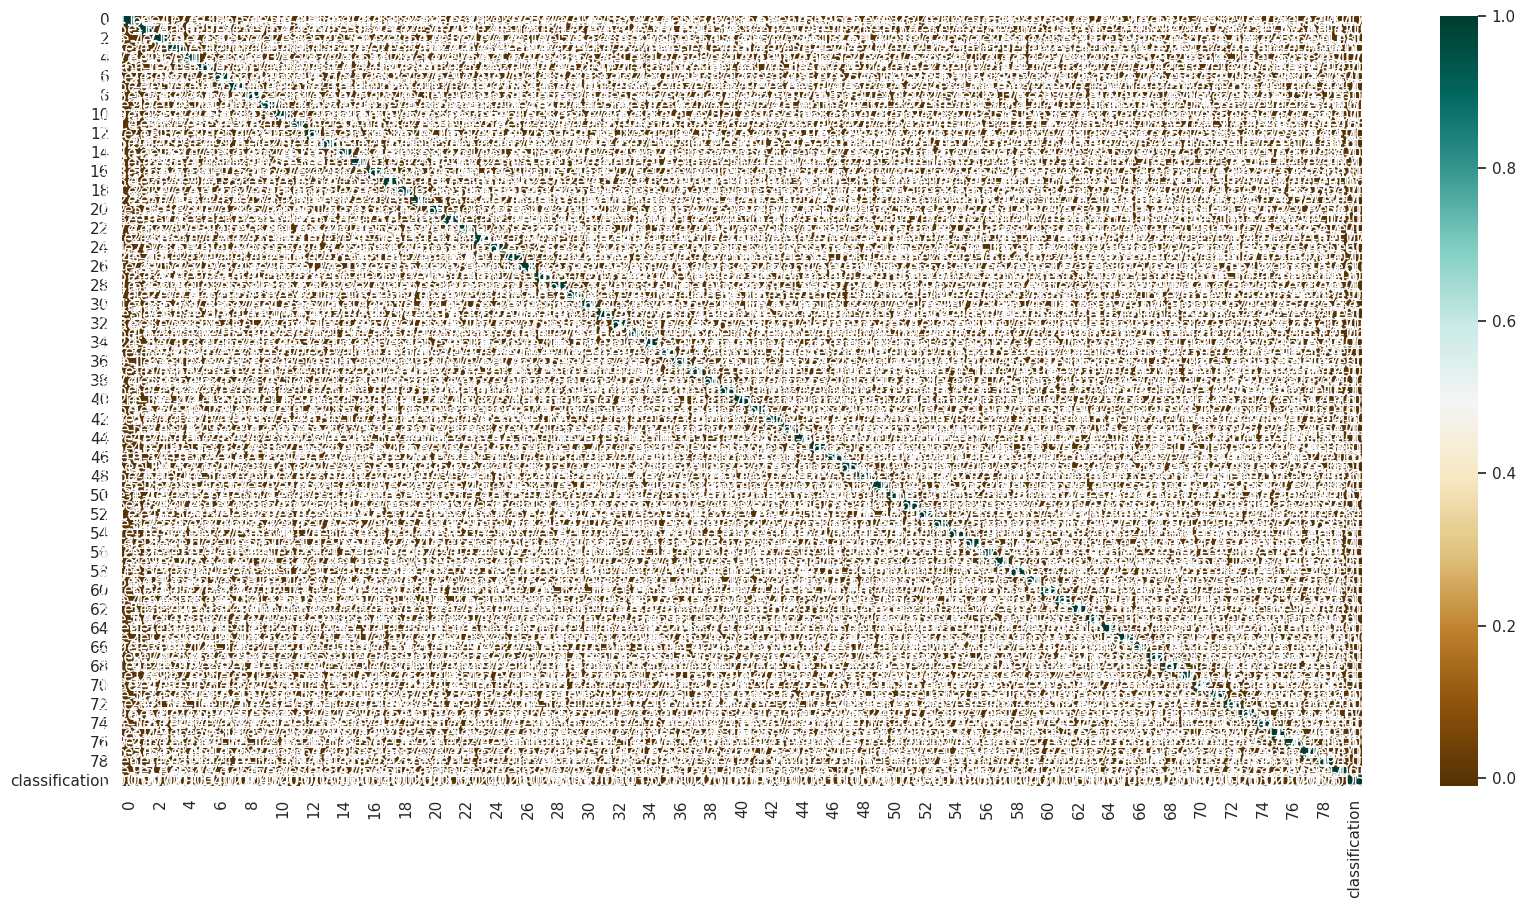

In [57]:
plt.figure(figsize=(20,10))
c= df5_pca.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

After doing a first PCA we can see and increased the number of features to 89, we process to analyse our algorithms in order to see which one give to us the best prediction.

In [58]:
df5_array = df5_pca.values

In [59]:
X = df5_array[:,0:80]
y = df5_array[:,80]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [60]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators= 500 , max_depth=10)))

In [61]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.983395 (0.000094)
LDA: 0.982145 (0.000597)
KNN: 0.983374 (0.000083)
CART: 0.959498 (0.001577)
NB: 0.865331 (0.233442)
SVM: 0.983395 (0.000094)
RF: 0.983333 (0.000132)


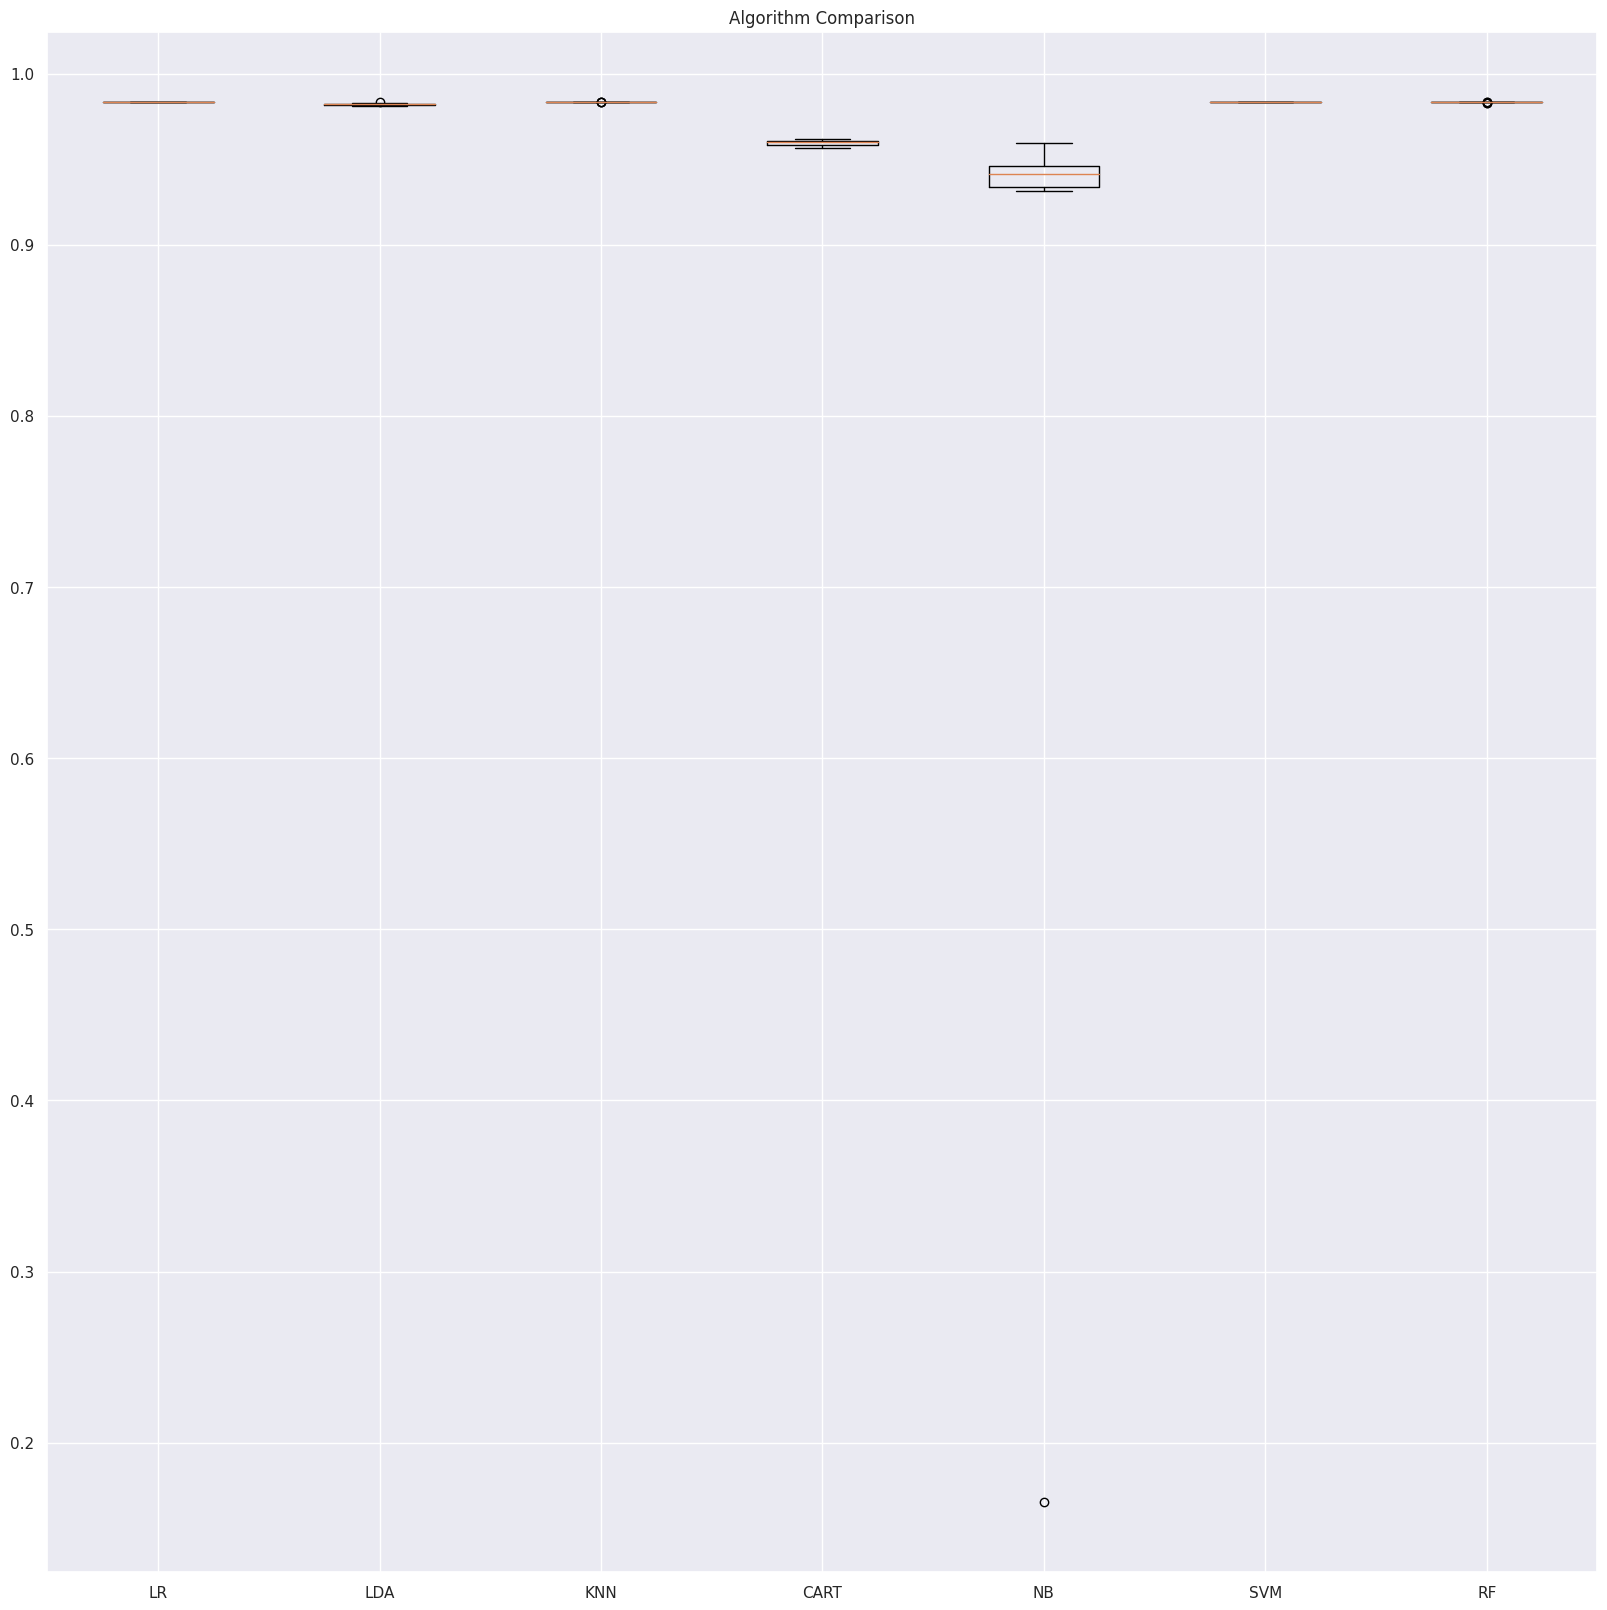

In [62]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [63]:
modelLR = LogisticRegression(solver='liblinear', multi_class='ovr')
modelLR.fit(X_train, Y_train)
predictions = modelLR.predict(X_validation)

In [64]:
accuracy = accuracy_score(Y_validation, predictions)
print("{:.2f}%".format(accuracy*100))
confusion_mat=confusion_matrix(Y_validation, predictions)
print(confusion_mat)
print("Total cost = ", confusion_mat[0][1] * 10 + confusion_mat[1][0] * 500)

98.31%
[[11797     0]
 [  203     0]]
Total cost =  101500


In [65]:
modelKK = KNeighborsClassifier()
modelKK.fit(X_train, Y_train)
predictions = modelKK.predict(X_validation)

In [66]:
accuracy = accuracy_score(Y_validation, predictions)
print("{:.2f}%".format(accuracy*100))
confusion_mat=confusion_matrix(Y_validation, predictions)
print(confusion_mat)
print("Total cost = ", confusion_mat[0][1] * 10 + confusion_mat[1][0] * 500)

98.31%
[[11797     0]
 [  203     0]]
Total cost =  101500


As we can see next it is random forest the one who give us the best prediction just with 203 false negatives.

In [67]:
modelRF = RandomForestClassifier(n_estimators= 500 , max_depth=10)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(X_validation)

In [68]:
accuracy = accuracy_score(Y_validation, predictions)
print("{:.2f}%".format(accuracy*100))
confusion_mat=confusion_matrix(Y_validation, predictions)
print(confusion_mat)
print("Total cost = ", confusion_mat[0][1] * 10 + confusion_mat[1][0] * 500)

98.31%
[[11797     0]
 [  203     0]]
Total cost =  101500


Since we have decided to stay with randomforest, we have dediced to reanalise it using data no normalised since random forest does not need the data normalised to perform their predictions.

In [74]:
dfRF = df4.select_dtypes(include=['float64'])
medians = df4.median()
#df4=df4.fillna(medians, inplace=True)
dfRF=dfRF.fillna(medians)
dfRF['classification']=df3['classification']

<ipython-input-74-564a159e7e39>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfRF['classification']=df3['classification']


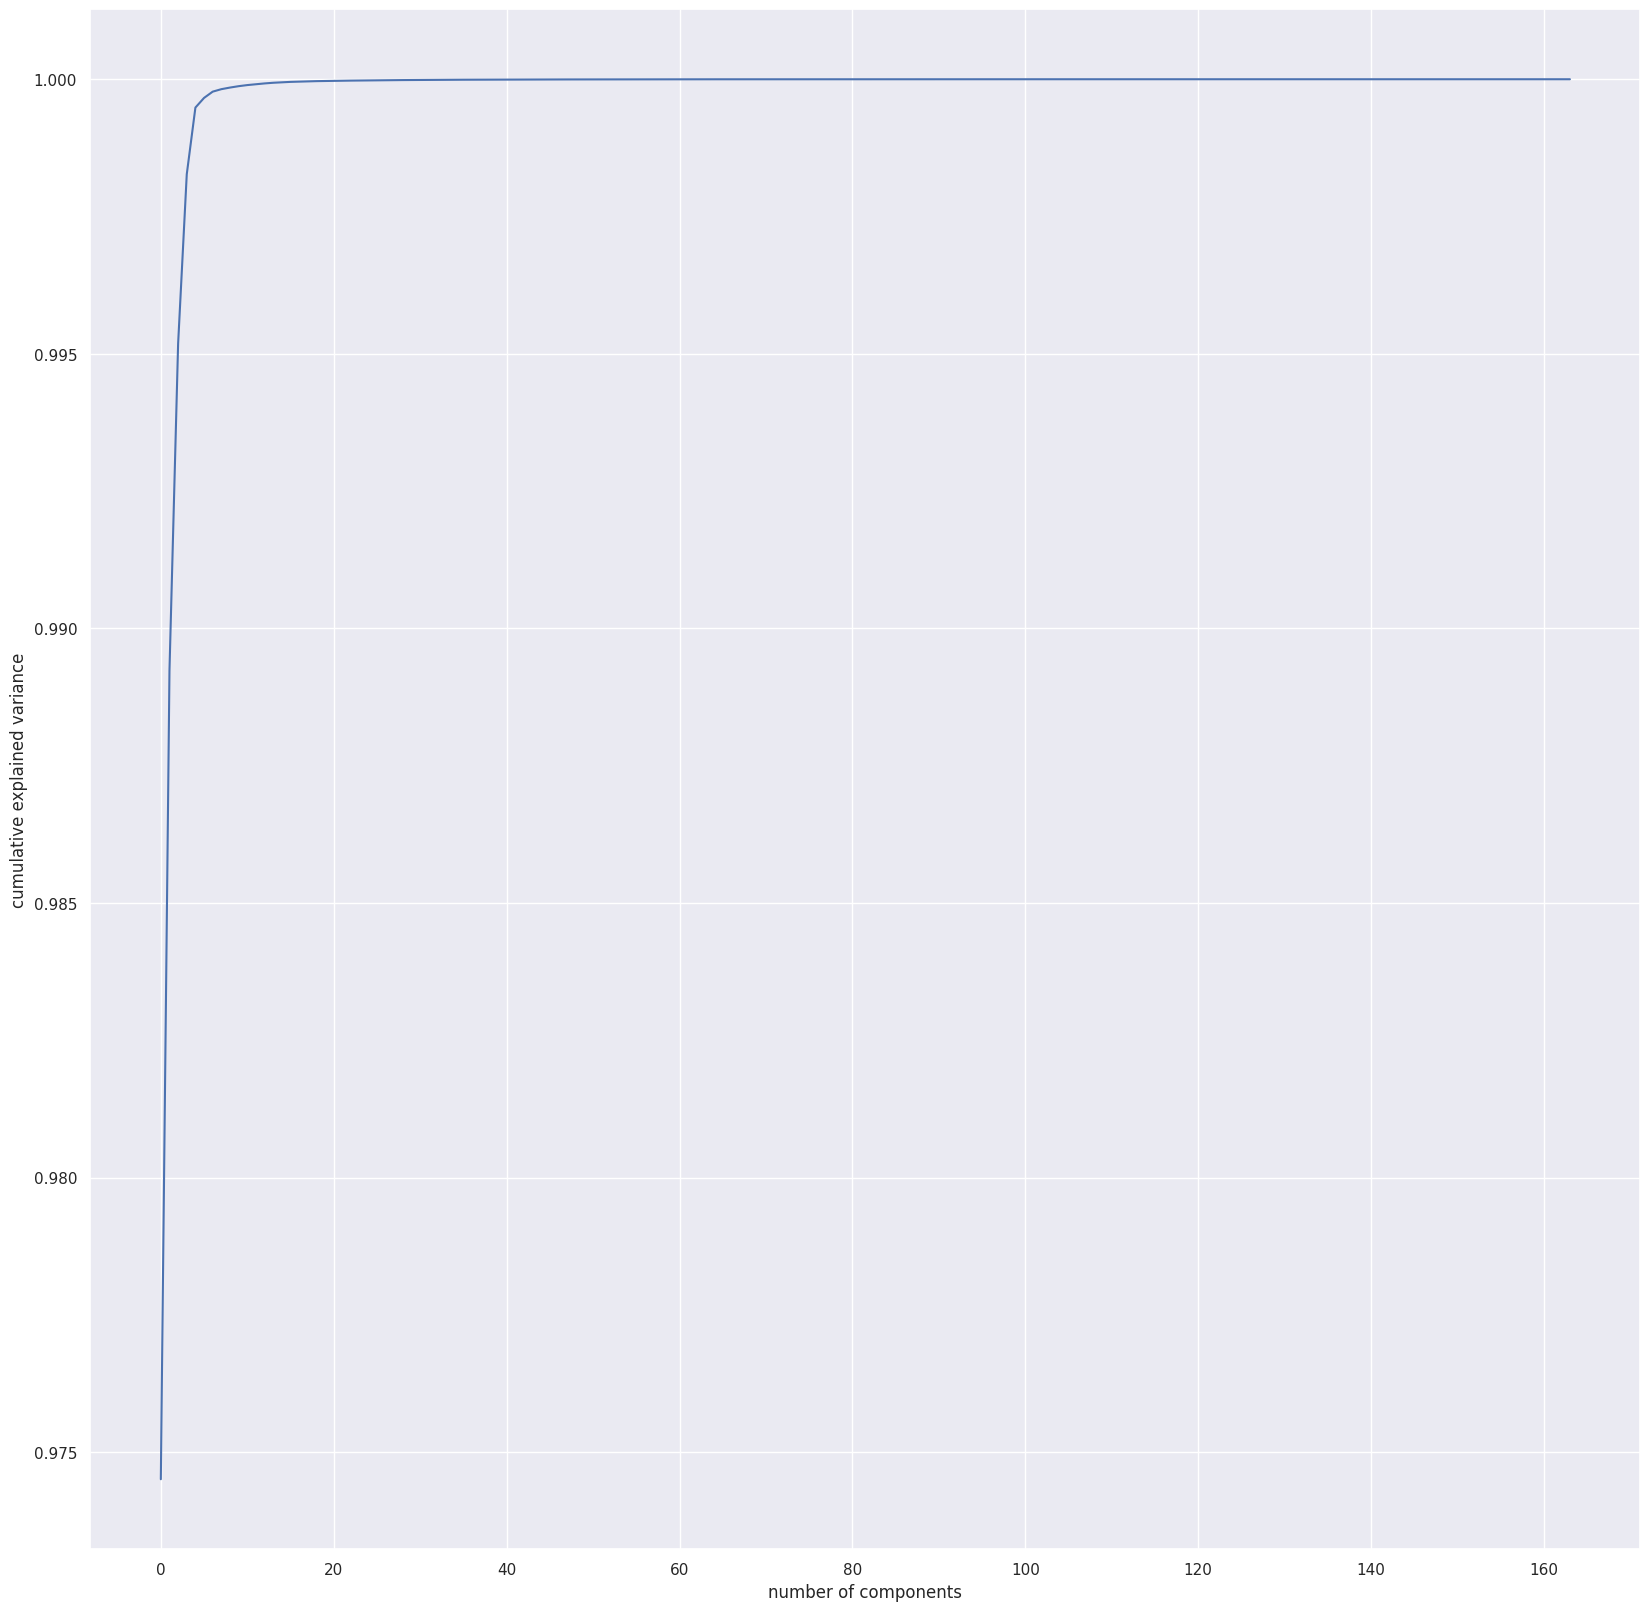

In [75]:
dfRF_no_label = dfRF.drop(dfRF["classification"])
pca = PCA().fit(dfRF_no_label)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Using random forest without normalised we just need 20 columns to perform our algorithm.

In [80]:
pca = PCA(20)
projected = pca.fit_transform(dfRF_no_label)
dfRF_pca= pd.DataFrame(projected)

dfRF_pca["classification"] = dfRF["classification"]
dfRF_array = dfRF_pca.values
X = dfRF_array[:,0:20]
y = dfRF_array[:,20]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

As we can see next because we know the reason why our random forest algorithm gave us just 203 false negative and none false positives we have decided to balance the database performing  an analysis of a threshold in a precision-recall curve.

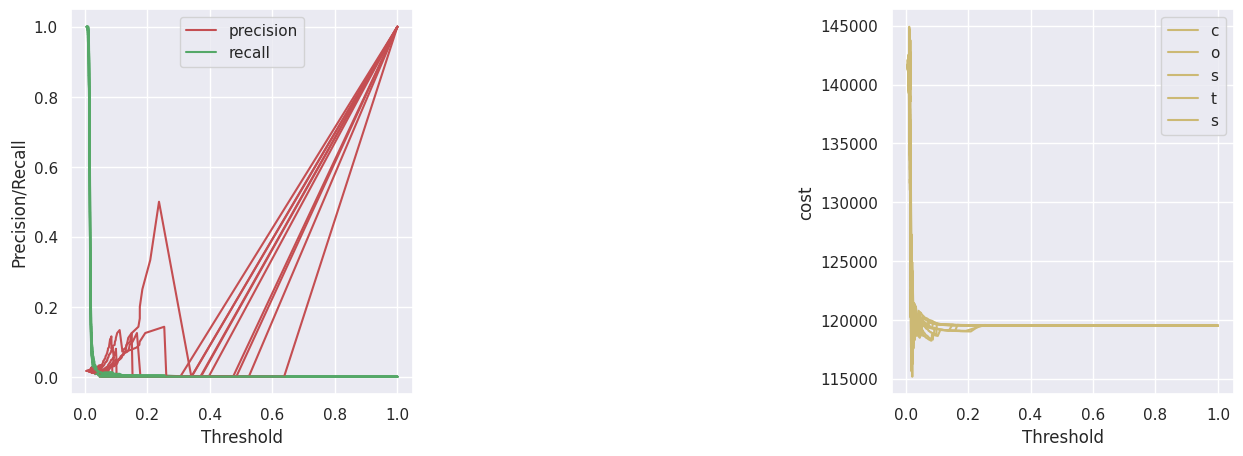

In [81]:
#CV for determining the best threshold
trail = 10
plot = []
for x in range(0,trail):
    train, test, y_tr, y_ts = train_test_split(X_train, Y_train, stratify = Y_train, train_size = 0.7)
    modelRF.fit(train,y_tr)
    pred = modelRF.predict_proba(test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_ts, pred)
    thresholds = np.append(thresholds,1)

    costs = []
    for threshold in thresholds:
        y_pred_thres = pred > threshold
        c = confusion_matrix(y_ts,y_pred_thres)
        cost = c[0,1] * 10 + c[1,0] * 500
        costs.append(cost)

    plot.append({'threshold': thresholds, 'precision':precision,'recall': recall, 'costs':costs})


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for x in plot:
    plt.plot(x['threshold'],x['precision'],'r')
    plt.plot(x['threshold'],x['recall'],'g')

plt.legend(('precision','recall'))
plt.xlabel('Threshold')
plt.ylabel("Precision/Recall")

plt.subplot(1,3,3)
for x in plot:
    plt.plot(x['threshold'],x['costs'],'y')
plt.legend(('costs'))
plt.xlabel('Threshold')
plt.ylabel("cost")
plt.show()

For reasons we might not understand yet our analysis of a threshold in a precision-recall curve did not gave us graph we can interpret.

In [87]:
modelRF = RandomForestClassifier(n_estimators= 500 , max_depth=10)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(X_validation)

In [88]:
accuracy = accuracy_score(Y_validation, predictions)
print("{:.2f}%".format(accuracy*100))
confusion_mat=confusion_matrix(Y_validation, predictions)
print(confusion_mat)
print("Total cost = ", confusion_mat[0][1] * 10 + confusion_mat[1][0] * 500)

98.31%
[[11797     0]
 [  203     0]]
Total cost =  101500


### As we cans see with our analysis the company can see the fact of sending the tucks to the mechanics to analysedifferents failures when the trucks are having problems with the APS system might cost them 101500€

## Minimum Requirements

### Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. and what these Characterisation mean.

### Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.

### Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.

### Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.  

### References

### John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team. (2021)  Available at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html / (Accesed: 28 October 2023)

###  Michael Waskom. (2023)  Available at https://seaborn.pydata.org/generated/seaborn.heatmap.html / (Accesed: 29 October 2023)

### ZACH. (2021) Available at: (https://www.statology.org/pandas-unique-values-in-column / (Accesed: 01 Nov 2023)

### scikit-learn developers. ( 2023) Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html / Accesed: 02 Nov 2023)